<div dir="rtl">
<b>فصل دوم - صفر تا صد پروژه یادگیری ماشین</b>
<br>
<i>توی این فصل درباره پیش بینی قیمت  خونه هایی در کالیفرنیاست. در کنار اینکه این نوت بوک حاوی توضیحات بیشتر به نسبت نسخه اصلی است.</i>

<h4> انواع پکیچ ها و کاربردهای ان </h4>

</div>

In [3]:
# Python ≥3.5 is required
import sys
# بررسی اینکه نسخه پایتون حداقل ۳.۵ است
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
# یکی از معروف ترین کتابخانه های یادگیری ماشین در پایتون
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
# کتابخانه کار با اعداد
import numpy as np
# کتابخانه رابط پایتون و موارد مربوط به سیستم عامل
import os

# موارد لازم برای رسم و ذخیره کردن نمودارها
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# تابع ذخیره سازی نمودار 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
# برای اینکه اگر به خطای خاصی برخورد کردیم نادیدش بگیریم
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<div dir="rtl">
<h3>دریافت فایل ها</h3>
</div>

In [5]:
# کتابخانه های مربوط به کار با فایل فشرده و ادرس
import tarfile
import urllib

# ادرس فایل خانه ها در کنار محل دانلودش
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
# تابع مربوط به دانلود فایل ها
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

<div dir="rtl">
<h3>
پانداس یکی از معروف ترین کتابخانه های پایتون در زمینه داده کاوی و مدیریت داده هاست. این فایل دریافتی ما یک فایلcsv است که باید اون رو با کمک پانداس بخونیم و ازش استفاده کنیم
</h3>
</div>

In [6]:
# ایمپورت کتابخونه پانداس
import pandas as pd
# تابع مربوط به خوندن فایل csv
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
# دریافت داده ها  و ریختن اون در متغییر خاصی
housing = load_housing_data()
# نمایش ۵ عدد ابتدایی داده ها
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
# اطلاعات کلی داده ها
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
# وضعیت توزیع داده ها در ویژگی های مختلف
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/home/amin/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/amin/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/amin/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/amin/.local/lib/python3.6/site-packages/pandas/plo

Saving figure attribute_histogram_plots


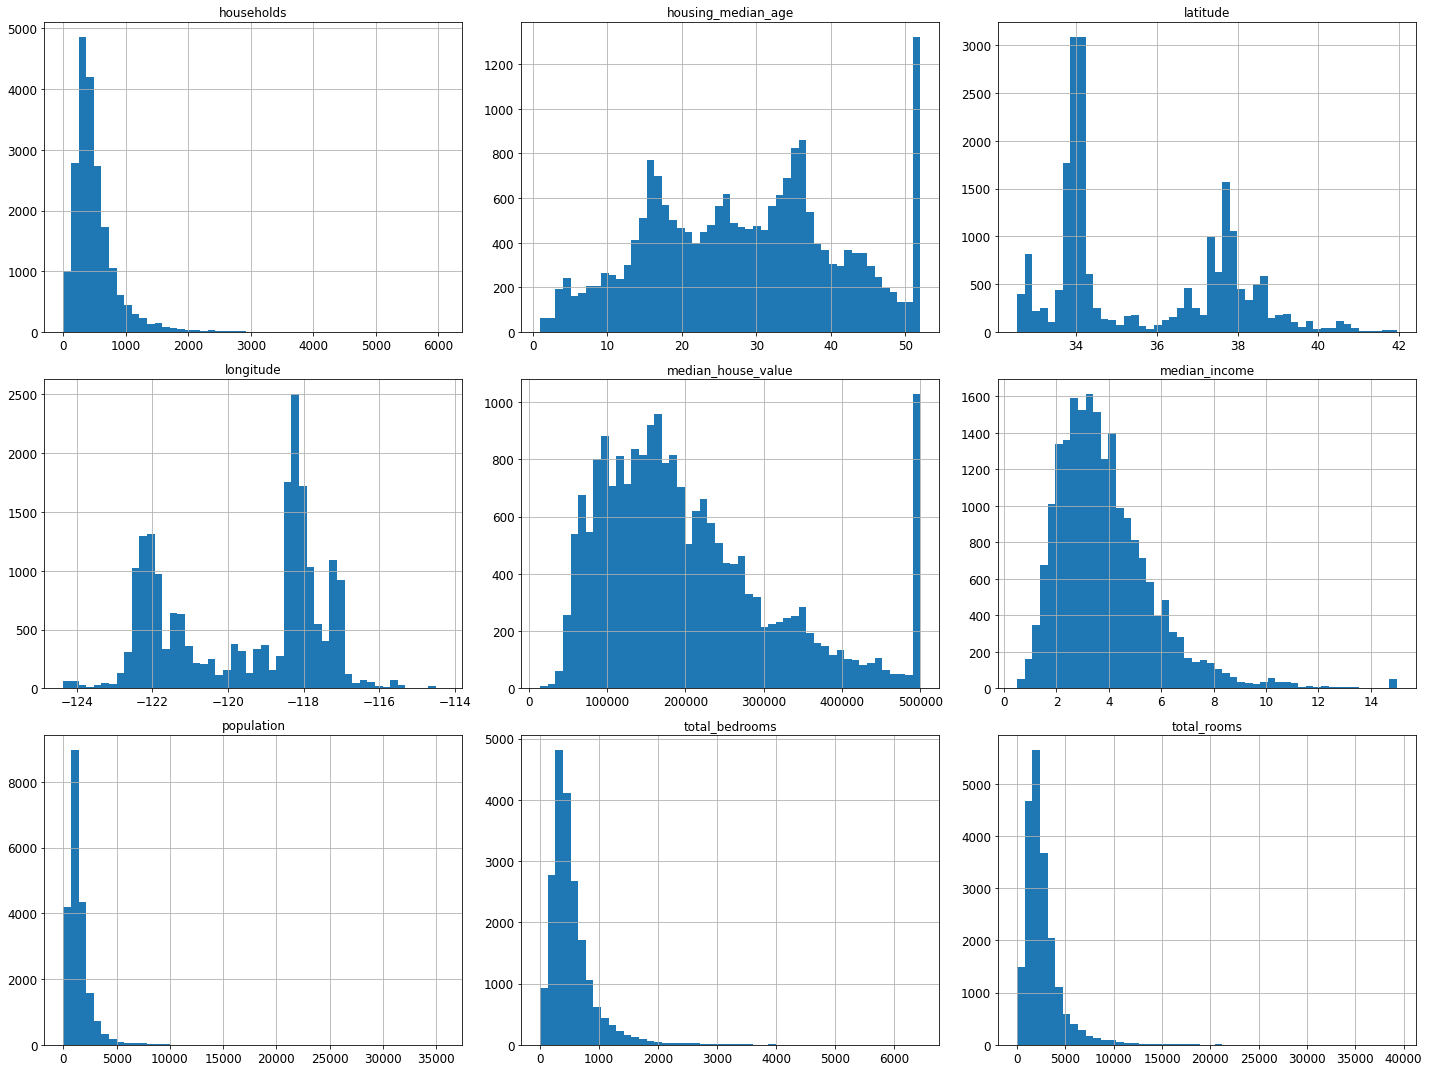

In [18]:
# رسم نمودار از توزیع داده ها در بخش های مختلف
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [19]:
# با این کار باعث میشه در هر دفعه اجرا مقادیر خروجی مشابه چیزی که الان میبینید باشه برای همگان هم یکسان هستند
np.random.seed(42)
# اطلاعات بیشتر
# https://en.wikipedia.org/wiki/Random_seed

In [20]:
# تقسیم بندی داده ها به دو بخش آموزشی  و تست
# باتوجه به اینکه تقسیم بندی پایه اون اعداد تصادفی در کامپیوتر هستند پس نیازه که تعداد دیتاست زیاد باشه برای عادلانه بودن تقسیم بندی
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# البته با کمک sklearn هم میشه داده ها رو تقسیم بندی کرد نگاه کنید به
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
# تقسیم بندی داده ها
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [22]:
len(test_set)

4128

In [1]:
# بررسی میکینم که به  درستی مقدار حدود ۰.۲ به بخش تست اختصاص داده شده
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
# با این کا یک ستون جداگونه ای برای index قرار میدم
housing.reset_index()
# البته به خاطر اینکه حالت پیشفرض دیتاست ستونی به همین اسم دارد نیازی نیست ولی طبق آموزش اصلی پیش میریم


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([    0,     1,     2, ..., 20637, 20638, 20639])

In [23]:
# تقسیم بندی دیتاست به بخش آموزش و تست
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [24]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [25]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


<div dir="rtl">
<h3>راه حل بهتر </h3>
چه روشی بهتر هست؟
با این کار یک لیست به اندازه تمام ایندکس ها میسازیم و اینکه لازم نیست دیتافریم پانداس رو دست کاری کنیم البته این وقتی که از توابع سایکیت لرن استفاده میکنید به کار میادش</div>

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


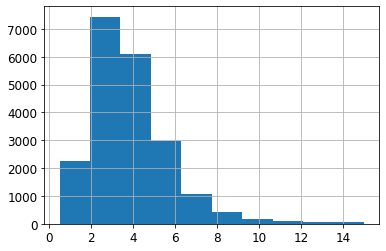

In [27]:
# توزیع داده ها در میان متوسط ورودی
housing["median_income"].hist()

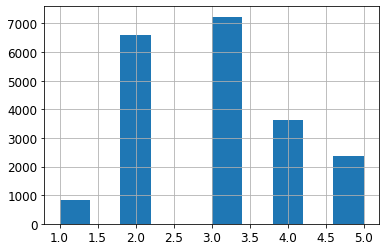

In [30]:
# دسته بندی میزان درآمد در چندین دسته مختلف
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
# نمایش توزیع داده ها
housing["income_cat"].hist()

In [40]:
# روش دیگر برای دسته بندی داده ها در دسته آموزش و تست
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [41]:
# برای اینکه اینطور کد ها رو بهتر بفهمیم بهتر هست تیکه به تیکه اجرا کنیم و  بعدش سرهم شدش رو بررسی کنیم

strat_test_set["income_cat"].value_counts() / len(strat_test_set)



3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [49]:
# این تعداد رکورد های هر دسته رو میده بهمون
strat_test_set["income_cat"].value_counts()


3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [50]:
# این هم طولش رو میده
len(strat_test_set)

4128

In [51]:
# در نهایت این بهمون میزان هر دسته به درصد رو میده
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
# پس این هم توزیع کلی داده ها در دسته های مختلف رو بهم به درصد میده
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<div dir="rtl">
<h3>کاوش در داده ها و مصور سازی آنها</h3>
</div>